<a href="https://colab.research.google.com/github/raisul587/r/blob/main/CATvsDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
!unzip kagglecatsanddogs_5340.zip

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os

import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [32]:
for class_name in os.listdir("PetImages"):
    for path in os.listdir("PetImages/"+class_name):
        if class_name.lower() == 'dog':
            label.append(1)
        elif class_name.lower() == 'cat':
            label.append(0)
        else:
            continue  # Skip other classes

        input_path.append(os.path.join("PetImages", class_name, path))

print(input_path[0], label[0])

PetImages/Cat/12273.jpg 0


In [33]:
print(input_path[10], label[10])

PetImages/Cat/9198.jpg 0


In [34]:
len(label)

50004

In [35]:
len(input_path)

50004

In [38]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,PetImages/Dog/1714.jpg,1
1,PetImages/Dog/11673.jpg,1
2,PetImages/Cat/1810.jpg,0
3,PetImages/Cat/6706.jpg,0
4,PetImages/Cat/11644.jpg,0


In [63]:
for i in df['images']:
    if '.jpg' not in i:
        print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db
PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [66]:
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Dog/11702.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Cat/666.jpg']
len(df)

49996

In [65]:
import PIL
l = []
for image in df['images']:
    try:
        img = PIL.Image.open(image)
    except:
        l.append(image)
l

['PetImages/Cat/666.jpg',
 'PetImages/Cat/666.jpg',
 'PetImages/Dog/11702.jpg',
 'PetImages/Dog/11702.jpg']

In [ ]:
plt.figure(figsize=(25,25))
temp_dogs = df[df['label']==1]['images']
start_dogs = random.randint(0, len(temp_dogs))
files_dogs = temp_dogs[start_dogs:start_dogs+25]

for index, file in enumerate(files_dogs):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Dogs')
    plt.axis('off')

In [ ]:
plt.figure(figsize=(25,25))
temp_cats = df[df['label']==0]['images']
start_cats = random.randint(0, len(temp_cats))
files_cats = temp_cats[start_cats:start_cats+25]

for index, file in enumerate(files_cats):
    plt.subplot(5,5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title('Cats')
    plt.axis('off')

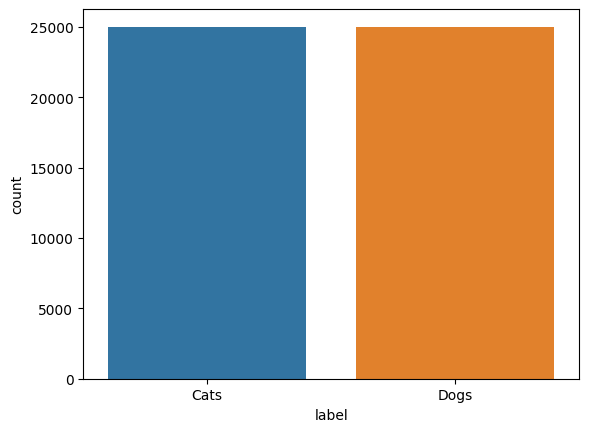

In [52]:
sns.countplot(x='label', data=df)
plt.xticks(ticks=[0, 1], labels=['Cats', 'Dogs'])
plt.show()

In [67]:
print(df['label'].value_counts())

1    24998
0    24998
Name: label, dtype: int64


In [68]:
df['label'] = df['label'].astype('str')
df.head()

,images,label
0,PetImages/Dog/1714.jpg,1
1,PetImages/Dog/11673.jpg,1
2,PetImages/Cat/1810.jpg,0
3,PetImages/Cat/6706.jpg,0
4,PetImages/Cat/11644.jpg,0


In [69]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [70]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255,  # normalization of images
    rotation_range = 40, # augmention of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

val_iterator = val_generator.flow_from_dataframe(
    test,x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
)

Found 39996 validated image filenames belonging to 2 classes.
Found 10000 validated image filenames belonging to 2 classes.


In [71]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
])

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 64)       

In [73]:
history = model.fit(train_iterator, epochs=10,
validation_data=val_iterator)

Epoch 1/10
79/79 [==============================] - 241s 3s/step - loss: 0.6675 - accuracy: 0.6016 - val_loss: 0.6018 - val_accuracy: 0.6610
Epoch 2/10
79/79 [==============================] - 238s 3s/step - loss: 0.5562 - accuracy: 0.7130 - val_loss: 0.5468 - val_accuracy: 0.7251
Epoch 3/10
79/79 [==============================] - 238s 3s/step - loss: 0.5144 - accuracy: 0.7431 - val_loss: 0.4801 - val_accuracy: 0.7714
Epoch 4/10
79/79 [==============================] - 237s 3s/step - loss: 0.4745 - accuracy: 0.7707 - val_loss: 0.4571 - val_accuracy: 0.7824
Epoch 5/10
79/79 [==============================] - 240s 3s/step - loss: 0.4489 - accuracy: 0.7888 - val_loss: 0.4297 - val_accuracy: 0.8031
Epoch 6/10
79/79 [==============================] - 241s 3s/step - loss: 0.4325 - accuracy: 0.7966 - val_loss: 0.3965 - val_accuracy: 0.8219
Epoch 7/10
79/79 [==============================] - 238s 3s/step - loss: 0.4169 - accuracy: 0.8100 - val_loss: 0.3930 - val_accuracy: 0.8265
Epoch 8/10
79

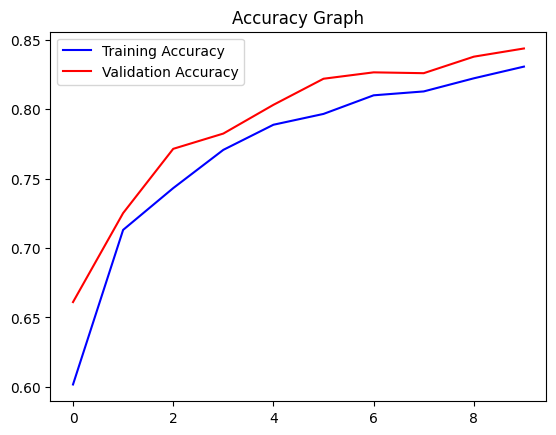

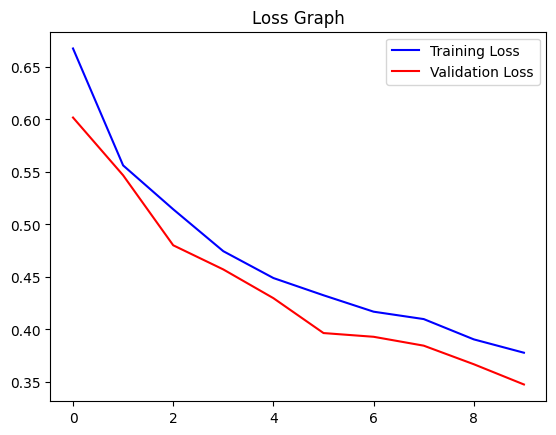

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()